# KNN K-Nearest Neighbor
kita akan coba buat model machine learning dengan algoritma KNN untuk data heart_2022_Key_Indicators

In [27]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# scaling untuk data continuous numeric
# encoding untuk data discrete categorical --> di convert menjadi angka 0 1 2 3 ...
# misalkan data adalah "Sunny" "Cloudy" "Rainy" --> 0 1 2, 0: Sunny, 1: Cloudy, 2: Rainy
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder

In [2]:
# import data
df_heart = pd.read_csv("../dataset/heart_2022_Key_indicators.csv")

df_heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
# df_heart = df_heart.head(1000)
# boleh kurangi dulu datanya jika kelamaan nunggu pelatihan model

In [18]:
df_heart.shape

(319795, 18)

In [3]:
# bikin copy data
df_heart_encoded = df_heart.copy()

In [4]:
# convert data non-numerik yang categorical jadi angka dengan encoding

le = LabelEncoder()

df_heart_encoded["HeartDisease"] = le.fit_transform(df_heart["HeartDisease"])
print(le.classes_)

['No' 'Yes']


kolom HearDisease sudah di convert dari "No" menjadi 0, "Yes" menjadi 1

In [5]:
df_heart_encoded.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,0,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,0,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,0,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,0,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


kalau datanya lebih dari 2, maka hasil labelnya juga akan lebih dari 2. misalkan kolom GenHealth

In [6]:
le = LabelEncoder()

df_heart_encoded["GenHealth"] = le.fit_transform(df_heart["GenHealth"])
print(le.classes_)

['Excellent' 'Fair' 'Good' 'Poor' 'Very good']


In [7]:
df_heart_encoded.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,4,5.0,Yes,No,Yes
1,0,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,4,7.0,No,No,No
2,0,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,1,8.0,Yes,No,No
3,0,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,2,6.0,No,No,Yes
4,0,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,4,8.0,No,No,No


sebenarnya, untuk data kategorikal yang ada ranking seperti GenHealth, baiknya kita gunakan function encoding yang namana Ordinal Encoder, karena dia mengurutkan datanya sesuai rankingnya.

[ordinal encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)

ranking: Poor, Fair, Good, Very good, Excellent -- urut dari paling buruk ke paling baik

In [36]:
# sample ordinal encoder

# Siapkan OrdinalEncoder dengan categories yang sudah urut
encoder = OrdinalEncoder(categories=[['Poor', 'Fair', 'Good', 'Very good', 'Excellent']])

# Gunakan encoder
# replace df_heart_encoded["GenHealth"] menjadi versi yang sudah di encode
df_heart_encoded["GenHealth"] = encoder.fit_transform(df_heart[["GenHealth"]])

df_heart_encoded.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,3.0,5.0,Yes,No,Yes
1,0,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,3.0,7.0,No,No,No
2,0,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,1.0,8.0,Yes,No,No
3,0,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,2.0,6.0,No,No,Yes
4,0,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,3.0,8.0,No,No,No


In [15]:
# fitur dan target.
X = df_heart[["BMI", "PhysicalHealth", "MentalHealth"]]
y = df_heart["HeartDisease"]

# scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split train dan test data
X_test, X_train, y_test, y_train = train_test_split(X_scaled, y, random_state=0)

In [16]:
# pembuatan dan pelatihan model
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

c:\Users\stefa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


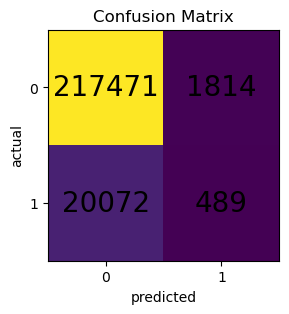

              precision    recall  f1-score   support

          No       0.92      0.99      0.95    219285
         Yes       0.21      0.02      0.04     20561

    accuracy                           0.91    239846
   macro avg       0.56      0.51      0.50    239846
weighted avg       0.86      0.91      0.87    239846



In [17]:
# evaluasi
def visualizeCM(cm):
    n = len(cm) # jumlah label/ kategori

    fig, ax = plt.subplots(figsize=(n+1, n+1))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=range(n))
    ax.set_xlabel("predicted")
    ax.yaxis.set(ticks=range(n))
    ax.set_ylabel("actual")
    ax.set_ylim( n - 0.5, -0.5)
    for i in range(n):
        for j in range(n):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize = 20)
    plt.title("Confusion Matrix")
    plt.show()

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
visualizeCM(cm)

print(classification_report(y_test, y_pred))

c:\Users\stefa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\stefa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

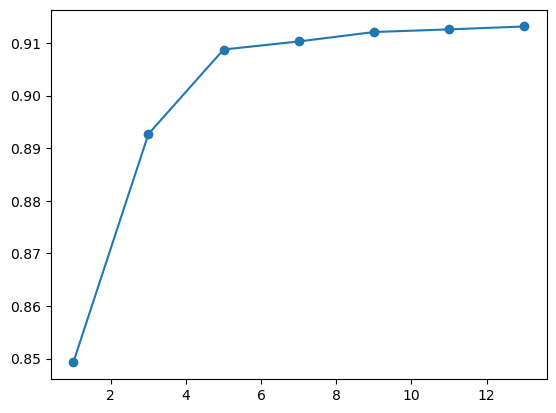

In [24]:
# cari jumlah neighbors K yang membuat model kita paling akurat
# misal kita cek jumlah neighbor dari 1 sampai 100

jumlah_k = range(1, 15, 2)

skor = []

for k in jumlah_k:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    skor.append(accuracy_score(y_test, y_pred))

plt.plot(jumlah_k, skor, marker="o")

ideal nya kita test jumlah K dari 1 sampai jumlah data kita - 1 untuk semua kemungkinan. Tapi di dunia nyata biasanya ini makan banyak waktu, tidak efektif. Jadi kita test beberapa K values saja sampai sepertinya sudah tidak ada perubahan yang signifikan di akurasi (atau error rate), lalu kita pilih jumlah K yang optimal.

untuk contoh diatas misalnya kita pilih K = 11

c:\Users\stefa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


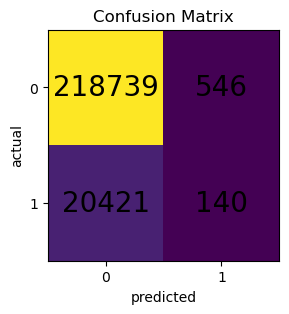

              precision    recall  f1-score   support

          No       0.91      1.00      0.95    219285
         Yes       0.20      0.01      0.01     20561

    accuracy                           0.91    239846
   macro avg       0.56      0.50      0.48    239846
weighted avg       0.85      0.91      0.87    239846



In [26]:
# setelah memilih jumlah K yang optimal, kita buat lagi modelnya
# jika tidak dipilih, default nya K adalah 5
model = KNeighborsClassifier(n_neighbors=11)
model.fit(X_train, y_train)

# lalu kita evaluasi
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
visualizeCM(cm)

print(classification_report(y_test, y_pred))

walaupun akurasi overall kelihatan meningkat di grafik, dan K sepertinya optimal. Kita perhatikan juga precision dan recall label "Yes" yang malah menurun. model ini lebih TIDAK bisa membuat prediksi untuk orang yang punya sakit jantung.

c:\Users\stefa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\stefa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

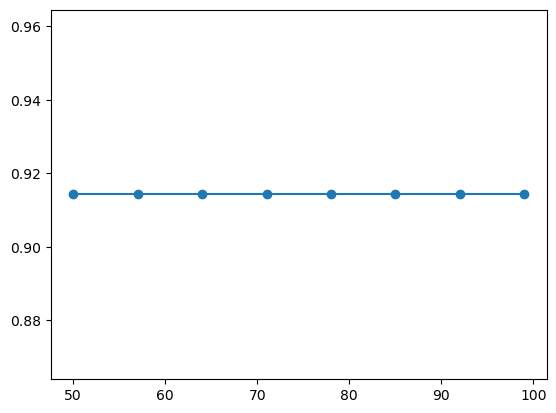

In [25]:
# kalau penasaran, berikut kita bisa cek saat jumlah K jauh lebih besar, dari 50, 57, 64, ... 100

jumlah_k = range(50, 100, 7)

skor = []

for k in jumlah_k:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    skor.append(accuracy_score(y_test, y_pred))

plt.plot(jumlah_k, skor, marker="o")

jumlah K yang lebih banyak bukan berarti model akan semakin akurat. Bisa dilihat jumlah K sudah tidak berpengaruh ke akurasi model.